In [1]:
#importing the necesary libararies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#loading and reading the excel file through pandas dataframe
df = pd.read_excel('Height-Weight Data.xlsx')

In [3]:
#viewing the fist 5 rows of the dataframe using head method.
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
#shape actually provides the information about rows and columns in the dataframe
#shape displays the tuple as (rows,columns)
df.shape

(3501, 2)

Text(0.5, 1.0, 'Weight according to height')

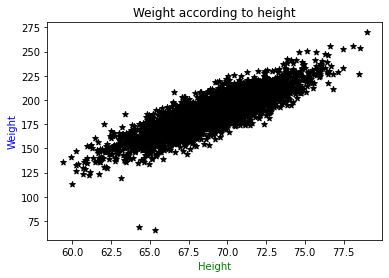

In [5]:
#scatter plot to visualize the dataframe in 2D,needs 2 values:one for x axis and one for y axis.
#plt.scater(x,y)
plt.scatter(df.Height,df.Weight,color = 'black',marker = '*')
#definition of the axis x and y
plt.xlabel('Height',color = 'green')
plt.ylabel('Weight',color = 'blue')
#title of the plot
plt.title('Weight according to height')

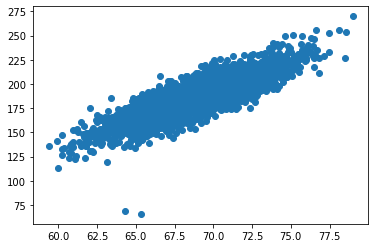

In [6]:
plt.scatter(df['Height'],df['Weight'])

In [7]:
#separating the feature(x) and target variable(y) from the dataframe using pandas drop function
#column 'Height' is stored in x by dropping 'Weight'
x = df.drop('Weight',axis=1)
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
#assigning the target 'rent' in y
#y is stored as 2 dimension
y = df[['Weight']]
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
#checking the shape of y
y.shape

(3501, 1)

In [10]:
#checking the mean value of 'x'
x.mean()

Height    69.024411
dtype: float64

In [11]:
#checking the mean value of 'y'
y.mean()

Weight    186.891258
dtype: float64

In [12]:
#importing libraries to split the 'x' and 'y' data into train and test sets
from sklearn.model_selection import train_test_split

In [13]:
#splitting training and testing data for both 'x' and 'y' by using train test split function where testing is 25%
#random state is used to fixed the shuffle sequence. 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [14]:
xtrain.head()

,Height
525,68.624063
1792,68.829216
3314,69.197548
1562,67.867665
3086,65.234102


In [15]:
#corresponding 'y' for the xtrain are stored in ytrain
ytrain.head()

,Weight
525,159.862467
1792,200.330819
3314,191.542329
1562,168.817572
3086,167.372980


In [16]:
#importing linear regression model from sklearn machine learning library.
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
#training the linear regression model
lr.fit(xtrain,ytrain)

LinearRegression()

In [19]:
#predicting the target y 
lr.predict([[65.234102]])

array([[164.18924256]])

In [20]:
#calculating the slope or coefficient 'm'
m=lr.coef_
m

array([[5.970757]])

In [21]:
#calculating the intercept 'c'
c = lr.intercept_
c

array([-225.30772886])

In [22]:
#predicting the target y 
ypred = (m*65.234102)+c
ypred

array([[164.18924256]])

In [23]:
#predicting all the area and storing them in a new column predicted rent.
df['predicted weight'] = lr.predict(x)

In [24]:
df

,Height,Weight,predicted weight
0,73.847017,241.893563,215.614865
1,68.781904,162.310473,185.372306
2,74.110105,212.740856,217.185702
3,71.730978,220.042470,202.980513
4,69.881796,206.349801,191.939493
...,...,...,...
3496,69.296830,185.649086,188.446804
3497,70.542201,210.198845,195.882614
3498,73.912549,202.429960,216.006142
3499,67.396021,144.277671,177.097534


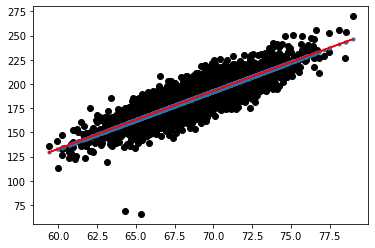

In [25]:
#plotting the best fit line
plt.plot(x,df['predicted weight'],color = 'red')
#plotting the actual data
plt.scatter(x,df['Weight'],color = 'black')
#plotting the points of predicted rent
plt.scatter(x,df['predicted weight'],marker = '.')


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mse = mean_squared_error(ytest,lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [28]:
mse

111.53431428776678

In [29]:
mae

8.226502913131542